<a href="https://colab.research.google.com/github/rasulamirov/Derivation-and-Integration/blob/main/Integration_derivation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import integrate

## A bunch of useless functions

In [ ]:
def integrateRectangle(df,col,T_st,T_end):# pass the full df
    # we assume that delta t i constant
    try:#
        delta = df['Time'].iloc[1] - df['Time'].iloc[0]
    except IndexError:# find the error name
        print('Not enough data')
    else:    
        #print(delta)
        df[df['Time']<=T_end]
        return df[(df['Time']<=T_end) & (df['Time']>=T_st)][col].sum()*delta

def integrateTrapezoid(df,col,T_st,T_end):
    try:
        delta = df['Time'].iloc[1] - df['Time'].iloc[0]
    except IndexError:
        print('No enough data')
    else:
        return integrateRectangle(df,col,T_st,T_end)+0.5*delta*(df[df['Time']==T_st][col].values[0]+ df[df['Time']==T_end][col].values[0])
def toTime(index, delta, initial=0):
    return index*delta+initial
def toIndex(time, delta, initial=0):
    return int((time-initial)/delta)

def fRI(data, T_st, T_end, delta=0.001):#data- just X values, delta - delta t, interval - (T_start,T_end)
    arr = np.cumsum(data)
    return delta*(arr[toIndex(T_end,delta)+1] - arr[toIndex(T_st,delta)])
def fTI(data, T_st, T_end, delta=0.001):
    return fRI(data, T_st, T_end, delta=0.001)+0.5*delta*(data[toIndex(T_st, delta)]+data[toIndex(T_end, delta)])


## Integration and derivation functions

In [ ]:
def nRI(data, delta):
    return delta*np.cumsum(data)
def nTI(data, delta, initial):
    return integrate.cumtrapz(data, dx=delta, initial=initial)

def derivative(data, delta):
    return np.gradient(data, delta)

## Plot functions

In [ ]:
def plotPosition(T, X, Xn, Y, Yn):
    plt.scatter(x=T, y=Xn, c='blue', s=0.5)
    plt.scatter(x=T, y=Yn, c='red', s=0.5)

    plt.scatter(x=T, y=X, c='green', s=0.5)
    plt.scatter(x=T, y=Y, c='violet', s=0.5)

    plt.title('Comparison of the position for an ideal and the noisy case')
    plt.xlabel('Time(s)')
    plt.ylabel('Position(m)')
    plt.legend(['Noisy X', 'Noisy Y', 'Ideal X', 'Ideal Y'], markerscale = 7.0)
    plt.show()
def plotVelocity(T, Vx, Vxn, Vy, Vyn):
    plt.scatter(x=T, y=Vxn, c='blue', s=0.5)
    plt.scatter(x=T, y=Vyn, c='red', s=0.5)

    plt.scatter(x=T, y=Vx, c='green', s=0.5)
    plt.scatter(x=T, y=Vy, c='violet', s=0.5)

    plt.title('Comparison of the velocity for an ideal and the noisy case')
    plt.xlabel('Time(s)')
    plt.ylabel('Velocity(m/s)')
    plt.legend(['Noisy Vx', 'Noisy Vy', 'Ideal Vx', 'Ideal Vy'], markerscale = 7.0)
    plt.show()
def plotAcceleration(T, Ax, Axn, Ay, Ayn):
    plt.scatter(x=T, y=Axn, c='blue', s=0.5)
    plt.scatter(x=T, y=Ayn, c='red', s=0.5)

    plt.scatter(x=T, y=Ax, c='green', s=0.5)
    plt.scatter(x=T, y=Ay, c='violet', s=0.5)

    plt.title('Comparison of the acceleration for an ideal and the noisy case')
    plt.xlabel('Time(s)')
    plt.ylabel('Acceleration(m/s^2)')
    plt.legend(['Noisy Ax', 'Noisy Ay', 'Ideal Ax', 'Ideal Ay'], markerscale = 7.0)
    plt.show()

def plotTrajectory(X, Xn, Y, Yn):
    plt.scatter(x=Xn, y=Yn, c='blue', s=0.5)

    plt.scatter(x=X, y=Y, c='red', s=0.5)

    plt.title('Comparison of the trajectory for the noisy and an indeal case')
    plt.xlabel('X(m)')
    plt.ylabel('Y(m)')
    plt.legend(['Noisy Trajectory', 'Ideal Trajectory'], markerscale = 7.0)
    plt.show()

def plotVelocityTrajectory(Vx, Vxn, Vy, Vyn):
    plt.scatter(x=Vxn, y=Vyn, c='blue', s=0.5)

    plt.scatter(x=Vx, y=Vy, c='red', s=0.5)

    plt.title('Comparison of the velocity trajectory for the noisy and an indeal case')
    plt.xlabel('Vx(m/s)')
    plt.ylabel('Vy(m/s)')
    plt.legend(['Noisy Velocity Trajectory', 'Ideal Velocity Trajectory'], markerscale = 7.0)
    plt.show()

def plotAccelerationTrajectory(Ax, Axn, Ay, Ayn):
    plt.scatter(x=Axn, y=Ayn, c='blue', s=0.5)

    plt.scatter(x=Ax, y=Ay, c='red', s=0.5)

    plt.title('Comparison of the acceleration trajectory for the noisy and an indeal case')
    plt.xlabel('Ax(m/s)')
    plt.ylabel('Ay(m/s)')
    plt.legend(['Noisy Acceleration Trajectory', 'Ideal Acceleration Trajectory'], markerscale = 7.0)

    plt.show()


## A -> X by integration

## Initiation

In [ ]:
delta = 0.1
T = np.arange(0,20+delta,delta)
Ax = -0.5*(np.pi**2)*np.sin(0.1*np.pi*T)
Ay = -2.0*(np.pi**2)*np.sin(0.2*np.pi*T)

In [ ]:

noise2 = np.random.normal(0.1, 1, size = T.shape)
noise2.mean()

0.08991086058936923

In [ ]:
Axn = Ax + noise2
Ayn = Ay + noise2


In [ ]:
Vxn = nTI(Axn, delta, initial=0)
Vxn = Vxn - Vxn.mean()
Vyn = nTI(Ayn, delta, initial=0)
Vyn = Vyn - Vyn.mean()

Vx = nTI(Ax, delta, initial=0)
Vx = Vx - Vx.mean()
Vy = nTI(Ay, delta, initial=0)
Vy = Vy - Vy.mean()

In [ ]:
Xn = nTI(Vxn, delta, initial=0)
Xn = Xn - Xn.mean()
Yn = nTI(Vyn, delta, initial=0)
Yn = Yn - Yn.mean()

X = nTI(Vx, delta, initial=0)
X = X - X.mean()
Y = nTI(Vy, delta, initial=0)
Y = Y - Y.mean()

## Plots

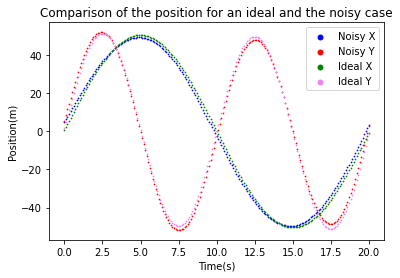

In [ ]:
plotPosition(T, X, Xn, Y, Yn)

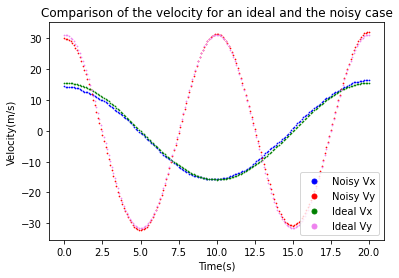

In [ ]:
plotVelocity(T, Vx, Vxn, Vy, Vyn)

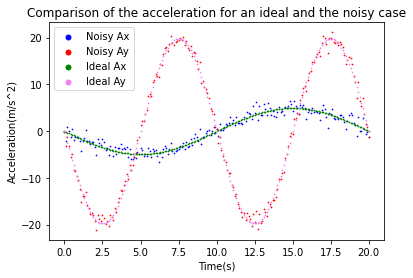

In [ ]:
plotAcceleration(T, Ax, Axn, Ay, Ayn)

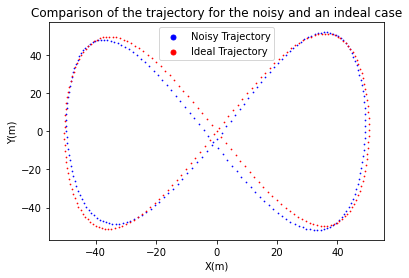

In [ ]:
plotTrajectory(X, Xn, Y, Yn)

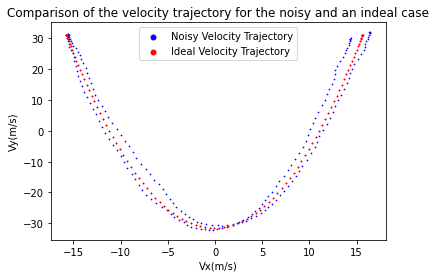

In [ ]:
plotVelocityTrajectory(Vx, Vxn, Vy, Vyn)

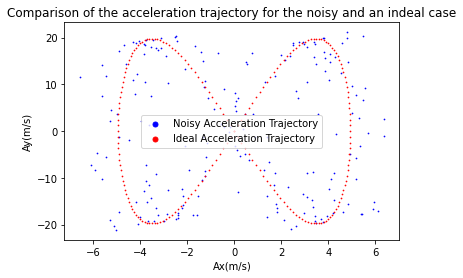

In [ ]:
plotAccelerationTrajectory(Ax, Axn, Ay, Ayn)
#looks like optical illusion

## X->Ax by derivation

In [ ]:
Xnold = Xn.copy()
Ynold = Yn.copy()
Vxnold = Vxn.copy()
Vynold = Vyn.copy()
Axnold = Axn.copy()
Aynold = Ayn.copy()

## Initiation

In [ ]:
delta = 0.1
T = np.arange(0,20+delta,delta)
X = 50.0*np.sin(0.1*np.pi*T)
Y = 50.0*np.sin(0.2*np.pi*T)

In [ ]:
noise = np.random.normal(5, 0.001, size = T.shape)# not sure about this

## CHanges
Before it was acceleration that had noise not X, y

In [ ]:
Xn = X + noise
Yn = Y + noise

In [ ]:
Vx = derivative(X, delta)
Vy = derivative(Y, delta)

Vxn = derivative(Xn, delta)
Vyn = derivative(Yn, delta)

In [ ]:
Ax = derivative(Vx, delta)
Ay = derivative(Vy, delta)

Axn = derivative(Vxn, delta)
Ayn = derivative(Vyn, delta)

## Plots

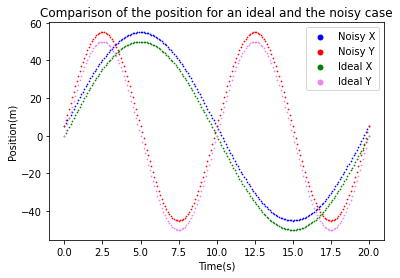

In [ ]:
plotPosition(T, X, Xn, Y, Yn)

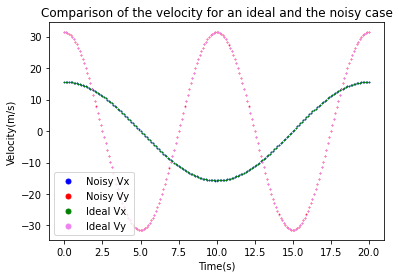

In [ ]:
plotVelocity(T, Vx, Vxn, Vy, Vyn)

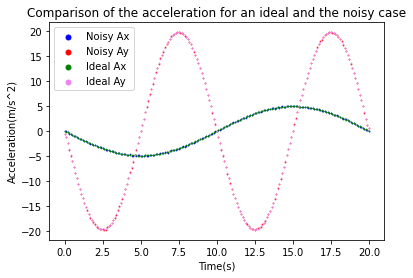

In [ ]:
plotAcceleration(T, Ax, Axn, Ay, Ayn)

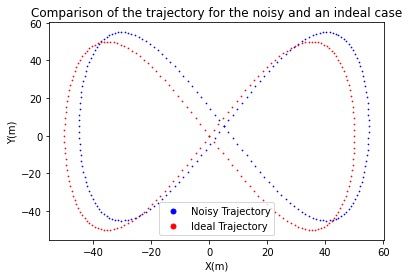

In [ ]:
plotTrajectory(X, Xn, Y, Yn)

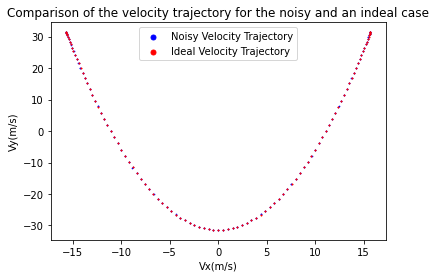

In [ ]:
plotVelocityTrajectory(Vx, Vxn, Vy, Vyn)

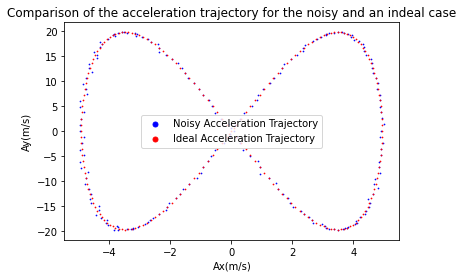

In [ ]:
plotAccelerationTrajectory(Ax, Axn, Ay, Ayn)

## For later
Maybe I can compare the standart deviation of the noisy functions from the clean

In [ ]:
##plt.scatter(T,Axn-Ax, s=0.4)

def plotError(true, derived):
    diff = derived - true
    plt.title('Distribution of error')
    plt.xlabel('Error')
    plt.ylabel('Frequency')
    plt.hist(diff, bins=50, density=True)
    plt.show()
    return diff.mean(), diff.std()

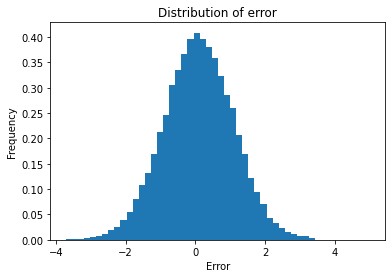

In [ ]:
st = plotError(Ax,Axnold)
#plotError(Vx,Vxnold)

In [ ]:
st

(0.09411354910528871, 1.0010545573253828)

In [ ]:

def plotDifference(integrated, differentiated, true, ttl):
    #derived1 = integrated
    #derived2 = differentiated
    #true = Ax
    diff1 = integrated - true
    diff2 = differentiated - true
    plt.title('Distribution of {} error for Integration and differentiation'.format(ttl))
    plt.xlabel('Error')
    plt.ylabel('Frequency')
    #plt.hist(diff1, bins=50, color='b', alpha=0.4, label='Integrated')
    plt.hist(diff2, bins=50, color='r', alpha=0.4, label='Differentiated')
    plt.legend()
    plt.show()

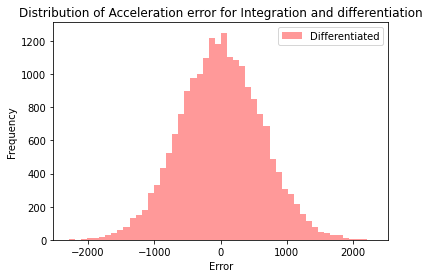

In [ ]:
plotDifference(Axnold,Axn,Ax,ttl='Acceleration')

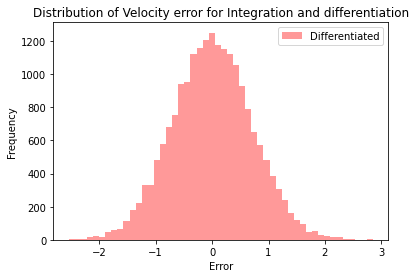

In [ ]:
plotDifference(Vynold,Vyn,Vy,ttl='Velocity')


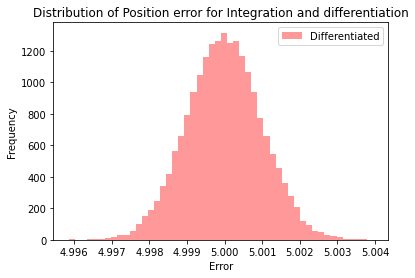

In [ ]:
plotDifference(Xnold,Xn,X,ttl='Position')


In [ ]:
(Xn-X).std()

0.00099541751084696

In [ ]:
(Xnold-X).std()

1.367885176150786